In [1]:
from dike_model_function import DikeNetwork
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.analysis import prim
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ema_workbench import MultiprocessingEvaluator, ema_logging
import pickle

In [2]:
model, _ = get_model_for_problem_formulation(2)

In [3]:
from ema_workbench import Samplers

ema_logging.log_to_stderr(ema_logging.INFO)

n_scenarios = 1000 #In assignment 5 is at first 1000 used and later on for the dimensional stacking 10000. 
n_policies = 8 #Not sure if we have to go for 8 again here like in the earlier exploratory modeling

use_pickle1 = False
if use_pickle1:
    with open('data/PRIM_results1.pickle','rb') as filehandler:
        results = pickle.load(filehandler)
else:
    with MultiprocessingEvaluator(model,n_processes=10) as evaluator:
        results = evaluator.perform_experiments(n_scenarios, n_policies, uncertainty_sampling=Samplers.LHS)
    
    with open('data/PRIM_results1.pickle',"wb") as filehandler:
        pickle.dump(results,filehandler)

[MainProcess/INFO] pool started with 10 workers
[MainProcess/INFO] performing 1000 scenarios * 8 policies * 1 model(s) = 8000 experiments
100%|██████████████████████████████████████| 8000/8000 [11:40<00:00, 11.42it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [4]:
experiments, outcomes = results

In [5]:
cleaned_experiments = experiments.drop(labels=[l.name for l in model.levers], axis=1)
##!!! Waarom worden de policies er hier uit gehaald

In [6]:
import numpy as np

data = outcomes['Expected Number of Deaths']
y = data < np.percentile(data, 95) #Not sure which percentile we need to use
###!!! Ook jan kwakkel heeft bij zijn analyse een y met true/false gemaakt
###!!! Maar waarom ziet de prim grafiek er als een bijna rechte lijn uit

In [7]:
#threshold (float) – the density threshold that a box has to meet
#Not sure which tresholds we need to use?
prim_alg = prim.Prim(cleaned_experiments,y, threshold=0.8, peel_alpha=0.05) 
box1 = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 8000 points remaining, containing 7600 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.661, coverage: 0.6957894736842105, density: 1.0 restricted_dimensions: 4


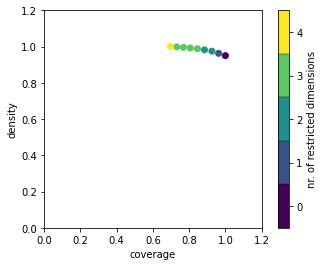

In [8]:
box1.show_tradeoff()
plt.show()

coverage    0.695789
density     1.000000
id          8.000000
mass        0.661000
mean        1.000000
res_dim     4.000000
Name: 8, dtype: float64

              box 8                                          
                min       max                       qp values
A.3_pfail  0.143165  0.999562   [6.939451656835716e-57, -1.0]
A.2_pfail  0.100185  0.999188   [6.154425988610529e-40, -1.0]
A.1_pfail  0.103759  0.999242  [3.4808352566532545e-24, -1.0]
A.5_pfail  0.043319  0.999701   [7.442899516899087e-05, -1.0]



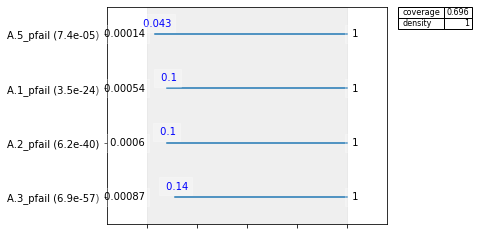

In [9]:
box1.inspect()
box1.inspect(style='graph')
plt.show()

In [10]:
from ema_workbench.analysis import dimensional_stacking

[MainProcess/INFO] model dropped from analysis because only a single category


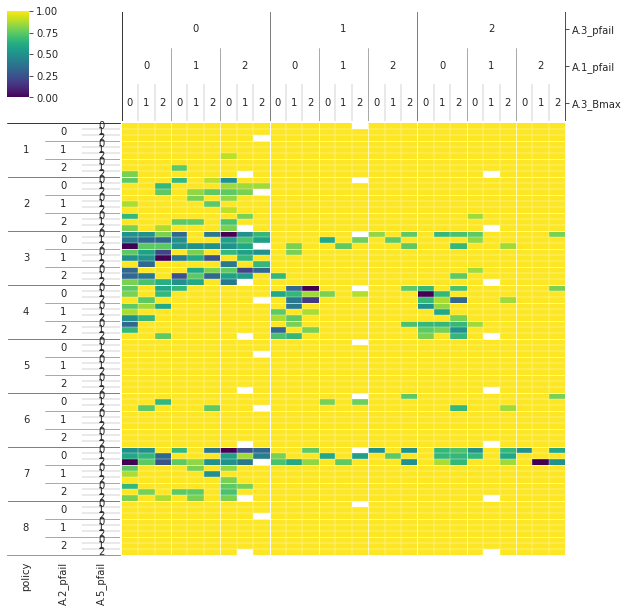

In [11]:
dimensional_stacking.create_pivot_plot(cleaned_experiments, y)
plt.show()